In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('balance.csv')
data=pd.DataFrame(data=data)
data

,Class,L-weight,L-Distance,R-weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
5,R,1,1,2,1
6,R,1,1,2,2
7,R,1,1,2,3
8,R,1,1,2,4
9,R,1,1,2,5


In [4]:
data.head()

,Class,L-weight,L-Distance,R-weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [5]:
data.tail()

,Class,L-weight,L-Distance,R-weight,R-Distance
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4
624,B,5,5,5,5


In [6]:
data.dtypes

Class         object
L-weight       int64
L-Distance     int64
R-weight       int64
R-Distance     int64
dtype: object

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
Class         625 non-null int32
L-weight      625 non-null int64
L-Distance    625 non-null int64
R-weight      625 non-null int64
R-Distance    625 non-null int64
dtypes: int32(1), int64(4)
memory usage: 22.1 KB


In [7]:
data.describe()

,L-weight,L-Distance,R-weight,R-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [8]:
data.isnull().sum()

Class         0
L-weight      0
L-Distance    0
R-weight      0
R-Distance    0
dtype: int64

In [9]:
data['Class'].unique()

array(['B', 'R', 'L'], dtype=object)

In [10]:
data.shape

(625, 5)

In [12]:
le=LabelEncoder()
list1=['Class']
for val in list1:
    data[val]=le.fit_transform(data[val].astype(str))

In [13]:
data

,Class,L-weight,L-Distance,R-weight,R-Distance
0,0,1,1,1,1
1,2,1,1,1,2
2,2,1,1,1,3
3,2,1,1,1,4
4,2,1,1,1,5
5,2,1,1,2,1
6,2,1,1,2,2
7,2,1,1,2,3
8,2,1,1,2,4
9,2,1,1,2,5


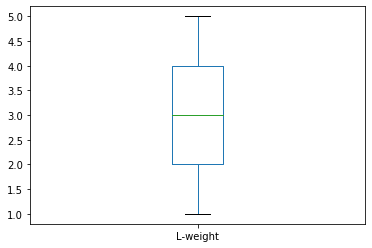

In [14]:
data['L-weight'].plot.box()

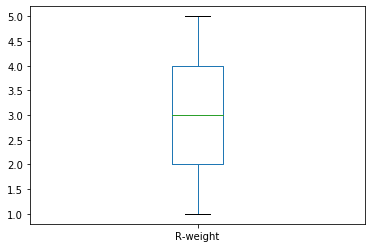

In [15]:
data['R-weight'].plot.box()

In [20]:
y = data[['Class']]
X = data.drop(['Class'], axis = 1)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)
x

array([[-1.41421356, -1.41421356, -1.41421356, -1.41421356],
       [-1.41421356, -1.41421356, -1.41421356, -0.70710678],
       [-1.41421356, -1.41421356, -1.41421356,  0.        ],
       ...,
       [ 1.41421356,  1.41421356,  1.41421356,  0.        ],
       [ 1.41421356,  1.41421356,  1.41421356,  0.70710678],
       [ 1.41421356,  1.41421356,  1.41421356,  1.41421356]])

In [22]:
x.shape

(625, 4)

In [23]:
y.shape

(625, 1)

In [24]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=0)

In [25]:
train_x.shape

(500, 4)

In [26]:
test_x.shape

(125, 4)

In [27]:
train_y.shape

(500, 1)

In [28]:
test_y.shape

(125, 1)

In [29]:
lg=LogisticRegression()

In [30]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
pred=lg.predict(test_x)
print(pred)

[1 2 1 2 1 2 1 1 2 2 2 2 2 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 2 1 2 1 1
 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 2 1 2 2 1
 2 2 1 1 1 2 2 2 1 2 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 2 2 1 1 2 1 2 1 1 2 1 1
 2 1 2 1 2 1 1 2 2 1 2 1 1 2]


In [32]:
print("accuracy score:",accuracy_score(pred,test_y))

accuracy score: 0.904


In [33]:
print(confusion_matrix(test_y,pred))

[[ 0  1  3]
 [ 0 65  5]
 [ 0  3 48]]


In [34]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      0.93      0.94        70
           2       0.86      0.94      0.90        51

    accuracy                           0.90       125
   macro avg       0.60      0.62      0.61       125
weighted avg       0.88      0.90      0.89       125



In [36]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predmnb))
print(confusion_matrix(test_y,predmnb))
print(classification_report(test_y,predmnb))

NameError: name 'predmnb' is not defined

In [37]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.792
[[ 0  1  3]
 [ 9 56  5]
 [ 8  0 43]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      0.80      0.88        70
           2       0.84      0.84      0.84        51

    accuracy                           0.79       125
   macro avg       0.61      0.55      0.58       125
weighted avg       0.89      0.79      0.84       125



In [38]:
dtc=KNeighborsClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.816
[[ 0  1  3]
 [ 8 61  1]
 [ 8  2 41]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.95      0.87      0.91        70
           2       0.91      0.80      0.85        51

    accuracy                           0.82       125
   macro avg       0.62      0.56      0.59       125
weighted avg       0.91      0.82      0.86       125



In [39]:
y_pred_prob=lg.predict_proba(test_x)[:,1]
y_pred_prob

array([9.11855916e-01, 2.79446955e-05, 9.02283854e-01, 6.63105407e-02,
       8.21719588e-01, 3.58542071e-01, 9.06628503e-01, 9.06832820e-01,
       8.63252393e-02, 6.03698052e-02, 1.15325912e-02, 1.03000052e-02,
       5.98066287e-02, 8.02086677e-01, 6.14444632e-02, 8.95221205e-01,
       8.11010134e-01, 8.99278485e-01, 4.00557742e-01, 9.13527175e-01,
       8.95789759e-01, 6.24298404e-02, 4.89245461e-01, 8.17698614e-01,
       8.40464728e-01, 9.09330618e-01, 8.94391750e-01, 9.10097356e-01,
       3.45784137e-06, 1.23811194e-03, 9.01679658e-01, 8.96702739e-01,
       6.40947287e-02, 9.16295299e-01, 2.37970769e-05, 9.02180021e-01,
       9.19408965e-01, 8.92901439e-01, 4.86991752e-07, 7.91572614e-01,
       4.47478622e-01, 9.14484408e-01, 9.13069632e-01, 8.22905207e-01,
       9.21273022e-01, 7.94037361e-01, 9.12198388e-01, 1.06269151e-02,
       9.66608419e-03, 3.18212985e-06, 6.11078901e-02, 8.55309445e-03,
       8.35368676e-01, 8.17072360e-01, 7.32720832e-02, 5.61998431e-02,
      

In [42]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
rfr.score(train_x,train_y)

0.8462107244372744

In [45]:
rfr=RandomForestRegressor(n_estimators=100,random_state=46)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

0.8883532111853731

In [46]:
rfr=RandomForestRegressor(n_estimators=400,random_state=56)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

0.8919475793673658